<a href="https://colab.research.google.com/github/smitpatel201/IntroToMachineLearning/blob/main/HW6_Smit_Patel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from google.colab import drive

In [2]:
# Mount Google Drive to access the dataset
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/Housing.csv'

# Load the dataset into a DataFrame
housing_data = pd.read_csv(file_path)

# Fill any NaN values to ensure data consistency
housing_data.fillna(method='ffill', inplace=True)

Mounted at /content/drive


Epoch 1/500 - Training Loss: 25234788843520.0000 - Validation Loss: 30034156847104.0000
Epoch 2/500 - Training Loss: 25144722456576.0000 - Validation Loss: 27031536402432.0000
Epoch 3/500 - Training Loss: 22328727568384.0000 - Validation Loss: 24400673898496.0000
Epoch 4/500 - Training Loss: 19872174047232.0000 - Validation Loss: 22094888828928.0000
Epoch 5/500 - Training Loss: 17729186693120.0000 - Validation Loss: 20073379004416.0000
Epoch 6/500 - Training Loss: 15859738214400.0000 - Validation Loss: 18300532686848.0000
Epoch 7/500 - Training Loss: 14228914176000.0000 - Validation Loss: 16745222897664.0000
Epoch 8/500 - Training Loss: 12806252396544.0000 - Validation Loss: 15380264255488.0000
Epoch 9/500 - Training Loss: 11565189300224.0000 - Validation Loss: 14181898125312.0000
Epoch 10/500 - Training Loss: 10482539823104.0000 - Validation Loss: 13129360605184.0000
Epoch 11/500 - Training Loss: 9538083225600.0000 - Validation Loss: 12204511330304.0000
Epoch 12/500 - Training Loss: 8

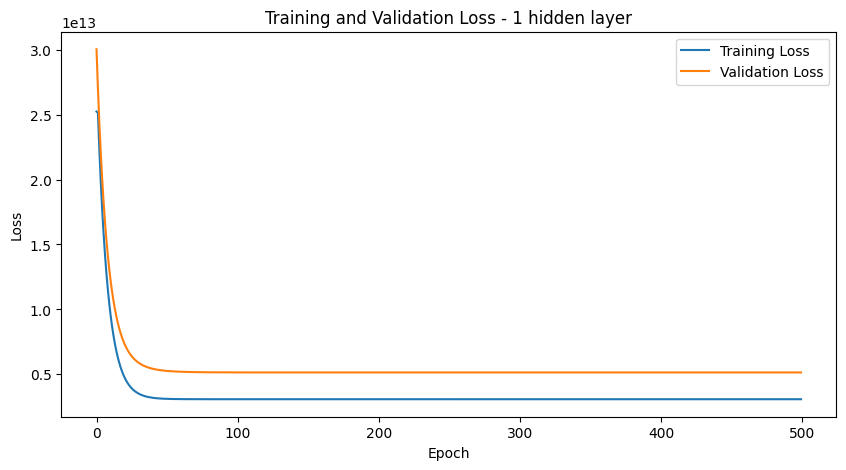

In [3]:
# Question 1a

# Separate the features and the target variable
features = housing_data.drop('price', axis=1)
target = housing_data['price']

# Identify categorical and numerical columns
categorical_columns = features.select_dtypes(include=['object']).columns
numerical_columns = features.select_dtypes(include=[np.number]).columns

# Define preprocessor with scaling for numerical and encoding for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Apply preprocessing to the features
X_processed = preprocessor.fit_transform(features)

# Convert the processed features and target to PyTorch tensors
X_tensor = torch.tensor(X_processed.astype(np.float32))
y_tensor = torch.tensor(target.values.astype(np.float32)).unsqueeze(1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define a simple neural network model with one hidden layer using Tanh activation
input_size = X_train.shape[1]
model = nn.Sequential(
    nn.Linear(input_size, 32),
    nn.Tanh(),
    nn.Linear(32, 1)  # Removed Sigmoid activation
)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Training the model
epochs = 500
train_losses = []
val_losses = []
for epoch in range(epochs):
    # Forward pass
    y_train_pred = model(X_train)
    train_loss = criterion(y_train_pred, y_train)
    train_losses.append(train_loss.item())

    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = criterion(y_val_pred, y_val)
        val_losses.append(val_loss.item())

    # Print the training and validation loss with the epoch number
    print(f"Epoch {epoch+1}/{epochs} - Training Loss: {train_loss:.4f} - Validation Loss: {val_loss:.4f}")

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - 1 hidden layer')
plt.legend()
plt.show()

Epoch 1/500 - Training Loss: 25234788843520.0000 - Validation Loss: 30091037900800.0000
Epoch 2/500 - Training Loss: 25198178861056.0000 - Validation Loss: 28516540219392.0000
Epoch 3/500 - Training Loss: 23719936262144.0000 - Validation Loss: 27044125605888.0000
Epoch 4/500 - Training Loss: 22340507271168.0000 - Validation Loss: 25667081076736.0000
Epoch 5/500 - Training Loss: 21053283762176.0000 - Validation Loss: 24379129856000.0000
Epoch 6/500 - Training Loss: 19852104302592.0000 - Validation Loss: 23174427181056.0000
Epoch 7/500 - Training Loss: 18731218501632.0000 - Validation Loss: 22047497388032.0000
Epoch 8/500 - Training Loss: 17685255553024.0000 - Validation Loss: 20993233911808.0000
Epoch 9/500 - Training Loss: 16709208506368.0000 - Validation Loss: 20006872023040.0000
Epoch 10/500 - Training Loss: 15798402809856.0000 - Validation Loss: 19083961565184.0000
Epoch 11/500 - Training Loss: 14948480581632.0000 - Validation Loss: 18220348080128.0000
Epoch 12/500 - Training Loss: 

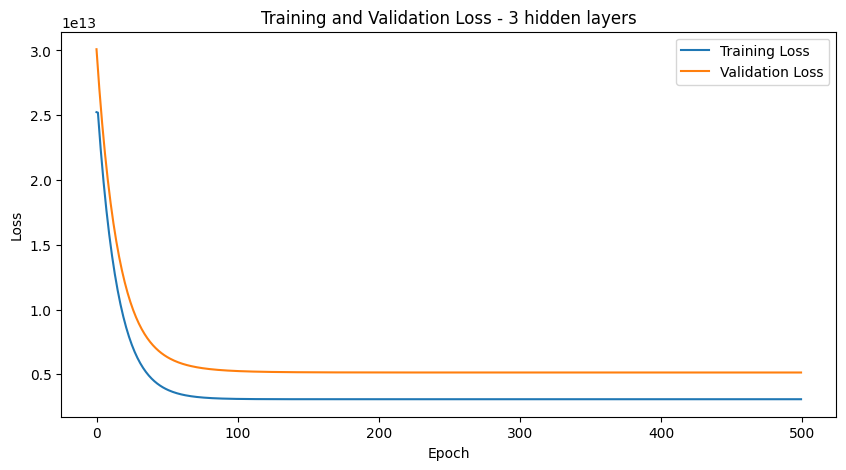

In [4]:
# Question 1b

# Separate the features and the target variable
features = housing_data.drop('price', axis=1)
target = housing_data['price']

# Identify categorical and numerical columns
categorical_columns = features.select_dtypes(include=['object']).columns
numerical_columns = features.select_dtypes(include=[np.number]).columns

# Define preprocessor with scaling for numerical and encoding for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Apply preprocessing to the features
X_processed = preprocessor.fit_transform(features)

# Convert the processed features and target to PyTorch tensors
X_tensor = torch.tensor(X_processed.astype(np.float32))
y_tensor = torch.tensor(target.values.astype(np.float32)).unsqueeze(1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define a neural network model with three hidden layers
input_size = X_train.shape[1]
model = nn.Sequential(
    nn.Linear(input_size, 32),
    nn.Tanh(),
    nn.Linear(32, 64),
    nn.Tanh(),
    nn.Linear(64, 16),
    nn.Tanh(),
    nn.Linear(16, 1)  # No activation function at the output for regression
)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Training the model
epochs = 500
train_losses = []
val_losses = []
for epoch in range(epochs):
    # Forward pass
    y_train_pred = model(X_train)
    train_loss = criterion(y_train_pred, y_train)
    train_losses.append(train_loss.item())

    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = criterion(y_val_pred, y_val)
        val_losses.append(val_loss.item())

    # Print the training and validation loss with the epoch number
    print(f"Epoch {epoch+1}/{epochs} - Training Loss: {train_loss:.4f} - Validation Loss: {val_loss:.4f}")

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - 3 hidden layers')
plt.legend()
plt.show()

In [5]:
# Question 2a

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

# Transformations for the input data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

# Load the training and test sets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Class labels in CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)  # CIFAR-10 images are 32x32x3
        self.fc2 = nn.Linear(512, 10)  # 10 classes

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
start_time = time.time()
for epoch in range(2):  # loop over the dataset multiple times (you can increase the number of epochs)

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')
training_time = time.time() - start_time

# Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
print(f"Training time: {training_time}s")

# Save the trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


100%|██████████| 170498071/170498071 [00:02<00:00, 80153808.94it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
[1,  2000] loss: 1.843
[1,  4000] loss: 1.669
[1,  6000] loss: 1.643
[1,  8000] loss: 1.602
[1, 10000] loss: 1.589
[1, 12000] loss: 1.564
[2,  2000] loss: 1.472
[2,  4000] loss: 1.494
[2,  6000] loss: 1.473
[2,  8000] loss: 1.479
[2, 10000] loss: 1.476
[2, 12000] loss: 1.492
Finished Training
Accuracy of the network on the 10000 test images: 47 %
Training time: 281.07781291007996s


In [8]:
# Question 2b

# Transformations for the input data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the training and test sets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Neural network architecture with additional layers
class ExtendedNet(nn.Module):
    def __init__(self):
        super(ExtendedNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

net = ExtendedNet()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network for 300 epochs
start_time = time.time()
epochs = 300
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')
training_time = time.time() - start_time

# Evaluate the network
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy}%')
print(f"Training time: {training_time}s")

# Save the trained model
PATH = './extended_cifar_net.pth'
torch.save(net.state_dict(), PATH)

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.042
[1,  4000] loss: 1.764
[1,  6000] loss: 1.688
[1,  8000] loss: 1.637
[1, 10000] loss: 1.575
[1, 12000] loss: 1.550


KeyboardInterrupt: ignored